In [2]:
#get papers for all companies using pymed library - and then rank order them to collect top 10 papers fro each company
import pandas as pd
import regex as re
#%pip install pymed
import numpy as np
from pymed import PubMed
pubmed_api_key = 'd3eec1f6d6ae8958046746ab8324ab97c608'


pubmed = PubMed(tool='PubMedSearcher', email='pari2798@gmail.com')
my_api_key = pubmed_api_key
pubmed.parameters.update({'api_key': my_api_key})


In [34]:
df_comapnies = pd.read_csv('aging_companies/Aging Companies - Companies.csv')

# disease and other columns need cleaning up

In [35]:
df_comapnies_running = (df_comapnies[df_comapnies['operating status'] =='operating']).reset_index(drop=True)

In [36]:
df_comapnies_running['company_name'] = df_comapnies_running['[HOW TO USE THIS TABLE]\ncompany']

In [37]:
df_comapnies_running['diseases'] =df_comapnies_running['diseases / indications']

In [38]:
def remove_newline(x):
    return x.replace('\n','')
def remove_all_characters_afternon_alphabet(x):
    return re.sub(r'[^a-zA-Z]+', ' ', x)


df_comapnies_running['company_name'] = df_comapnies_running['company_name'].apply(remove_newline)
df_comapnies_running['company_name'] = df_comapnies_running['company_name'].apply(remove_all_characters_afternon_alphabet)

In [39]:
# do extra check if there is an empty string

In [40]:
def find_non_empty_string(x):
    list_of_strings = []
    for i in range(len(x)):
        if x[i] != '':
            list_of_strings.append([x[i],i])
        else:
            list_of_strings.append(['None',i])
    return list_of_strings
    



In [41]:
def find_none_stringindoublelist(x):
    list_of_strings = []
    for i in range(len(x)):
        if x[i][0] =='None':
            list_of_strings.append(x[i])
    return list_of_strings

In [42]:
df_comapnies_running['diseases']

0                                                 cancer
1                                  chronic would healing
2      AD, cancer, glaucoma,\nCVD, unspecificed orpha...
3                                            AD, PD, TBI
4                                      cancer, cosmetics
                             ...                        
145                           OA, eyeDs, neuroDs, lungDs
146                                                  NaN
147                                                  NaN
148                     PD, AD, ALS/FTLD, \nglioblastoma
149                                  hair loss, wrinkles
Name: diseases, Length: 150, dtype: object

In [43]:
"""" function to replce NaN in the list with None string"""
def replace_nan_with_none(x):
    for i in range(len(x)):
        if x[i] != x[i]:
            x[i] = ''
    return x

In [44]:
disease_list = replace_nan_with_none(df_comapnies_running['diseases'])

/var/folders/qh/mr12tldn3g76pnlklr517bsm0000gn/T/ipykernel_55602/3359128392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = ''


In [58]:
print(disease_list)

0                                                 cancer
1                                  chronic would healing
2      AD, cancer, glaucoma,\nCVD, unspecificed orpha...
3                                            AD, PD, TBI
4                                      cancer, cosmetics
                             ...                        
145                           OA, eyeDs, neuroDs, lungDs
146                                                     
147                                                     
148                     PD, AD, ALS/FTLD, \nglioblastoma
149                                  hair loss, wrinkles
Name: diseases, Length: 150, dtype: object


# remove newline, comma, slash, other and split the diseases 

In [57]:


""" remove newline, comma, slash, other and split the diseases """

' remove newline, comma, slash, other and split the diseases '

In [ ]:
comapny_list = list(set(df_comapnies_running['company_name'].tolist()))

In [46]:
len(comapny_list)

150

In [47]:
comapny_list[0]

'Fauna Bio'

In [48]:
""" function to combine two lists in to a list of tuples"""

def combine_two_lists_into_tuple(x,y):
    list_of_tuples = []
    for i in range(len(x)):
        list_of_tuples.append((x[i],y[i]))
    return list_of_tuples

In [49]:
combine_two_lists_into_tuple(comapny_list,disease_list)

[('Fauna Bio', 'cancer'),
 ('Fountain Therapeutics', 'chronic would healing'),
 ('IntraClear Biologics',
  'AD, cancer, glaucoma,\nCVD, unspecificed orphan pediatric disease'),
 ('GenFlow Biosciences', 'AD, PD, TBI'),
 ('Equator Therapeutics', 'cancer, cosmetics'),
 ('Oisin Bio OncoSenX ', ''),
 ('Elevian', ''),
 ('Genome Protection', 'IHD, T2D, CHF, scarless healing'),
 ('Tiaki Therapeutics', ''),
 ('Endogena Therapeutics', 'AD, cancer, Covid'),
 ('Intervene Immune', 'AD, FTD, cancer'),
 ('YouthBio Therapeutics', 'cancer, neuroDs, inflammation'),
 ('Altos Labs', 'AD, PD, (wet) AMD, ESRD MCI'),
 ('LyGenesis', 'AD, other MCI'),
 ('NavitorPharmaceuticals', ''),
 ('NemaLife Inc ', 'PD, AD'),
 ('Ridgeline Therapeutics', ''),
 ('Younger Phenotype', 'PD'),
 ('Altoida', 'neuroDs, CVD, others'),
 ('Samsara Therapeutics', 'cancer, progeroidDs,\nundecided agingDs'),
 ('Centaura', 'cancer'),
 ('BioChange ltd', ''),
 ('Ichor Life Sciences was Therapeutics ', 'muscleDs,\nimmuneDs, COVID-19'),
 ('Pr

In [124]:

def get_papers_of_company(company_name):

    try:


        company_name = company_name.lower()
        query_new = "{0}[Affiliation]".format(company_name)
        results = pubmed.query(query_new, max_results=500)
        article_list = []
        
        
        for article in results:
            try:
                article_id = article.pubmed_id.partition('\n')[0]
                title = article.title
                doi = article.doi
                authors = article.authors
                abstract = article.abstract
                journal = article.journal
                publication_date = article.publication_date
                try:

                # Extract and format information from the article
    
                    if article.keywords:
                        if None in article.keywords:
                            article.keywords.remove(None)
                        keywords = '", "'.join(article.keywords)
                    tuple_article = (company_name,article_id,title,keywords,publication_date,abstract,journal,doi,publication_date,authors)

                except:
                    keywords = []
                    
                    tuple_article = (company_name,article_id,title,keywords,publication_date,abstract,journal,doi,publication_date,authors)

            except:
                pass
            
            article_list.append(tuple_article)
    except:
        article_list.append((company_name,'None','None','None','None','None','None','None','None','None'))
    return article_list

""" convert a list of tuples into a dataframe"""
def convert_list_of_tuples_to_dataframe(list_of_tuples):
    df = pd.DataFrame(list_of_tuples, columns=['company_name','article_id','title','keywords','publication_date','abstract','journal','doi','publication_date','authors'])
    return df
        

In [127]:
""" function that takes a list of companies and returns a dataframe of all the papers for each company"""   

def get_papers_for_all_companies(list_of_companies):
    list_of_dataframes = []
    for company in list_of_companies:
        list_of_tuples = get_papers_of_company(company)
        df = convert_list_of_tuples_to_dataframe(list_of_tuples)
        list_of_dataframes.append(df)
        
    return (pd.concat(list_of_dataframes)).reset_index(drop=True)

In [128]:
df_papers_company_all1 = get_papers_for_all_companies(comapny_list[0:50])

In [138]:
df_papers_company_all1 = pd.read_csv('comapny_papers_0_50.csv', index_col=0)

In [142]:
df_papers_company_all2 = pd.read_csv('comapny_papers_50_100.csv', index_col=0)
df_papers_company_all3 = pd.read_csv('comapny_papers_100_149.csv', index_col=0)


In [ ]:
#df_papers_company_all2 = get_papers_for_all_companies(comapny_list[50:100])
#df_papers_company_all2.to_csv('comapny_papers_50_100.csv')
#df_papers_company_all3= get_papers_for_all_companies(comapny_list[100:149])
#df_papers_company_all3.to_csv('comapny_papers_100_149.csv')

In [143]:
final_df = pd.concat([df_papers_company_all1,df_papers_company_all2,df_papers_company_all3]).reset_index(drop=True)

In [145]:
final_df = final_df.drop_duplicates(subset=['article_id'])

In [147]:
final_df = final_df.drop(columns=['publication_date.1'])

In [149]:
final_df = final_df.reset_index(drop=True)

In [151]:
final_df['publication_date'] = pd.to_datetime(final_df['publication_date'])

In [154]:
""" function that removes all rows in datetime column that are before given year"""

def remove_rows_before_year(df,year):
    df_copy = df.copy(deep=True)
    df_copy = df_copy[df_copy['publication_date'].df_copy.year >= year]
    return df_copy

In [156]:
data_frame_2018_above_papers = (remove_rows_before_year(final_df,2018)).reset_index(drop=True)

In [158]:
data_frame_2018_above_papers.to_csv('post2018_agingcomapnies_papers.csv')

In [4]:
len(list(set(data_frame_2018_above_papers['company_name'])))

100

# cleaning up the data of publications
## 1 abstracts that contain less than 10 words are removed
## 2 titles that contain less than 5 words are removed
## 3 abstract or titles that cotnain word correction are removed
## 4 empty abstracts, titles are removed

In [5]:
data_frame_2018_above_papers = pd.read_csv('data/publications/post2018_agingcomapnies_papers.csv', index_col=0)
df = data_frame_2018_above_papers.copy(deep=True)

In [6]:
def remove_empty_rows(df, column):
    df_empty = df[df[column].isna()]
    df_nonempty = df[df[column].notna()]
    return df_empty, df_nonempty

df_noindex, df_report_nonempty_abs = remove_empty_rows(df, 'abstract')


In [8]:
df_report_nonempty_abs = df_report_nonempty_abs.reset_index(drop=True)

In [10]:
""" function that splits abstracts and removes abstracts that contain less than 10 words"""

def split_abstracts(df):
    df_copy = df.copy(deep=True)
    df_copy['abstract'] = df_copy['abstract'].str.split()
    df_copy = df_copy[df_copy['abstract'].str.len() >= 10]
    return df_copy

In [11]:
df = split_abstracts(df_report_nonempty_abs)

In [5]:
data_frame_2018_above_papers
#contains empty abstracts so remvoe all rows with empty abstracts or title or keywords

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi,authors
0,fauna bio,36420970,Microvesicle release from inner segments of he...,"Microvesicle"", ""Mitochondria"", ""Photoreceptor""...",2022-11-25,Many inherited visual diseases arise from muta...,Disease models & mechanisms,10.1242/dmm.049871,"[{'lastname': 'Lewis', 'firstname': 'Tylor R',..."
1,fauna bio,35482869,Ancestry-inclusive dog genomics challenges pop...,"Microvesicle"", ""Mitochondria"", ""Photoreceptor""...",2022-04-29,Behavioral genetics in dogs has focused on mod...,"Science (New York, N.Y.)",10.1126/science.abk0639\n10.1038/nature04338\n...,"[{'lastname': 'Morrill', 'firstname': 'Kathlee..."
2,fauna bio,33536943,Dynamic RNA Regulation in the Brain Underlies ...,"ARE binding proteins"", ""AU-rich element (ARE)""...",2021-02-05,Hibernation is a physiological and behavioral ...,Frontiers in physiology,10.3389/fphys.2020.624677\n10.1021/acs.biochem...,"[{'lastname': 'Fu', 'firstname': 'Rui', 'initi..."
3,fauna bio,32734172,Veterinary informatics: forging the future bet...,"informatics"", ""medicine"", ""one health"", ""trans...",2020-08-01,This manuscript reviews the current state of v...,JAMIA open,10.1093/jamiaopen/ooaa005,"[{'lastname': 'Lustgarten', 'firstname': 'Jona..."
4,fauna bio,32569327,FasTag: Automatic text classification of unstr...,"informatics"", ""medicine"", ""one health"", ""trans...",2020-06-23,Unstructured clinical narratives are continuou...,PloS one,10.1371/journal.pone.0234647\n10.1212/WNL.49.3...,"[{'lastname': 'Venkataraman', 'firstname': 'Gu..."
...,...,...,...,...,...,...,...,...,...
3406,brainstorm cell therapeutics,34890069,A randomized placebo-controlled phase 3 study ...,"ALSFRS-R"", ""amyotrophic lateral sclerosis"", ""b...",2021-12-11,Amyotrophic lateral sclerosis (ALS) is a fatal...,Muscle & nerve,10.1002/mus.27472\n10.1056/NEJMra1603471\n10.3...,"[{'lastname': 'Cudkowicz', 'firstname': 'Merit..."
3407,brainstorm cell therapeutics,33468250,MSC-NTF (NurOwn®) exosomes: a novel therapeuti...,"Acute respiratory distress syndrome"", ""COVID-1...",2021-01-21,One of the most severe complications of the cu...,Stem cell research & therapy,10.1186/s13287-021-02143-w\n10.1007/s11606-020...,"[{'lastname': 'Kaspi', 'firstname': 'Haggai', ..."
3408,brainstorm cell therapeutics,32808546,Effects of MSC-NTF cells on T and B regulatory...,"Acute respiratory distress syndrome"", ""COVID-1...",2020-08-19,NaN,Amyotrophic lateral sclerosis & frontotemporal...,10.1080/21678421.2020.1800747,"[{'lastname': 'Kern', 'firstname': 'Ralph', 'i..."
3409,brainstorm cell therapeutics,31899540,Addressing heterogeneity in amyotrophic latera...,"amyotrophic lateral sclerosis"", ""biomarkers"", ...",2020-01-04,Amyotrophic lateral sclerosis (ALS) is a debil...,Muscle & nerve,10.1002/mus.26801,"[{'lastname': 'Goyal', 'firstname': 'Namita A'..."


# check how many companies are there , how many publications per company and how many unique authors per comapny

In [13]:
len(set(df['company_name']))

97

In [7]:
(data_frame_2018_above_papers['company_name']).value_counts(10)

intraclear biologics       0.146585
centers for age control    0.145998
shift biosciences          0.145412
animal biosciences         0.144826
gero                       0.048666
                             ...   
bhb therapeutics           0.000293
longevity biotech          0.000293
lyceum pharmaceuticals     0.000293
yuva biosciences           0.000293
senisca                    0.000293
Name: company_name, Length: 100, dtype: float64

# get rid of empty rows and values

In [14]:
""" fumction to remove rows with empty abstracts or title or keywords"""    

def remove_rows_with_empty_abstracts(df):
    df_copy = df.copy(deep=True)
    df_copy = df_copy.dropna(subset=['abstract','title','keywords'])
    return df_copy

In [51]:
df

,company_name,article_id,title,keywords,publication_date,abstract,journal,doi,authors
0,fauna bio,36420970,Microvesicle release from inner segments of he...,"Microvesicle"", ""Mitochondria"", ""Photoreceptor""...",2022-11-25,"[Many, inherited, visual, diseases, arise, fro...",Disease models & mechanisms,10.1242/dmm.049871,"[{'lastname': 'Lewis', 'firstname': 'Tylor R',..."
1,fauna bio,35482869,Ancestry-inclusive dog genomics challenges pop...,"Microvesicle"", ""Mitochondria"", ""Photoreceptor""...",2022-04-29,"[Behavioral, genetics, in, dogs, has, focused,...","Science (New York, N.Y.)",10.1126/science.abk0639\n10.1038/nature04338\n...,"[{'lastname': 'Morrill', 'firstname': 'Kathlee..."
2,fauna bio,33536943,Dynamic RNA Regulation in the Brain Underlies ...,"ARE binding proteins"", ""AU-rich element (ARE)""...",2021-02-05,"[Hibernation, is, a, physiological, and, behav...",Frontiers in physiology,10.3389/fphys.2020.624677\n10.1021/acs.biochem...,"[{'lastname': 'Fu', 'firstname': 'Rui', 'initi..."
3,fauna bio,32734172,Veterinary informatics: forging the future bet...,"informatics"", ""medicine"", ""one health"", ""trans...",2020-08-01,"[This, manuscript, reviews, the, current, stat...",JAMIA open,10.1093/jamiaopen/ooaa005,"[{'lastname': 'Lustgarten', 'firstname': 'Jona..."
4,fauna bio,32569327,FasTag: Automatic text classification of unstr...,"informatics"", ""medicine"", ""one health"", ""trans...",2020-06-23,"[Unstructured, clinical, narratives, are, cont...",PloS one,10.1371/journal.pone.0234647\n10.1212/WNL.49.3...,"[{'lastname': 'Venkataraman', 'firstname': 'Gu..."
...,...,...,...,...,...,...,...,...,...
3215,brainstorm cell therapeutics,36113170,Evaluation of neurotrophic factor secreting me...,"Progressive multiple sclerosis"", ""biomarker"", ...",2022-09-17,"[Autologous, mesenchymal, stem, cell, neurotro...","Multiple sclerosis (Houndmills, Basingstoke, E...",10.1177/13524585221122156,"[{'lastname': 'Cohen', 'firstname': 'Jeffrey A..."
3216,brainstorm cell therapeutics,34890069,A randomized placebo-controlled phase 3 study ...,"ALSFRS-R"", ""amyotrophic lateral sclerosis"", ""b...",2021-12-11,"[Amyotrophic, lateral, sclerosis, (ALS), is, a...",Muscle & nerve,10.1002/mus.27472\n10.1056/NEJMra1603471\n10.3...,"[{'lastname': 'Cudkowicz', 'firstname': 'Merit..."
3217,brainstorm cell therapeutics,33468250,MSC-NTF (NurOwn®) exosomes: a novel therapeuti...,"Acute respiratory distress syndrome"", ""COVID-1...",2021-01-21,"[One, of, the, most, severe, complications, of...",Stem cell research & therapy,10.1186/s13287-021-02143-w\n10.1007/s11606-020...,"[{'lastname': 'Kaspi', 'firstname': 'Haggai', ..."
3218,brainstorm cell therapeutics,31899540,Addressing heterogeneity in amyotrophic latera...,"amyotrophic lateral sclerosis"", ""biomarkers"", ...",2020-01-04,"[Amyotrophic, lateral, sclerosis, (ALS), is, a...",Muscle & nerve,10.1002/mus.26801,"[{'lastname': 'Goyal', 'firstname': 'Namita A'..."


In [52]:
df_clean_papers = remove_rows_with_empty_abstracts(df)

In [53]:
df_clean_papers = df_clean_papers.reset_index(drop=True)

In [54]:
len(set(df_clean_papers['company_name']))

97

In [23]:
df_clean_papers.to_csv('data_frame_2018_above_papers_clean.csv')

In [29]:
from collections import Counter
import seaborn as sns

def make_barplot(pdframe):
    pdframe = pd.DataFrame.from_dict(
        Counter(pdframe['company_name']), orient='index').reset_index()
    pdframe = pdframe.rename(columns = {'index': 'company_name',0:'Frequency'})
    pdframe = pdframe.dropna(axis=0)
    pdframe= pdframe.sort_values(by = ['Frequency'],ascending=False)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Frequency", y="company_name", data=pdframe.head(10))
    return ax

<AxesSubplot: xlabel='Frequency', ylabel='company_name'>

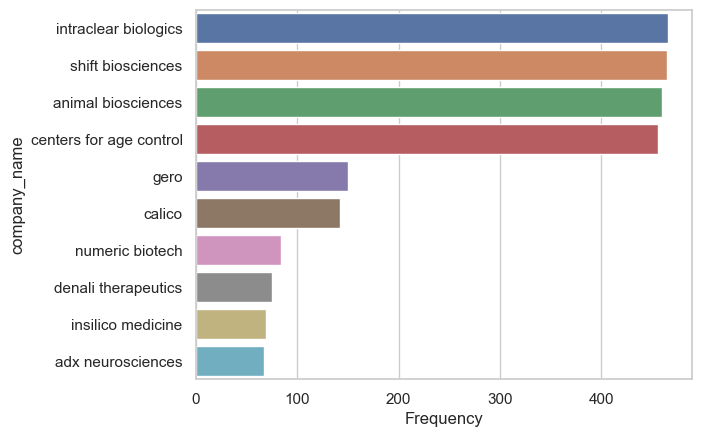

In [30]:
make_barplot(df_clean_papers)

# deal with the keywords and list of abstracts

In [55]:
""" convert abstract rows to a string with join """

def convert_abstracts_to_string(df):
    df_copy = df.copy(deep=True)
    df_copy['abstract'] = df_copy['abstract'].str.join(' ')
    return df_copy

In [56]:
df_clean_papers = convert_abstracts_to_string(df_clean_papers)

In [57]:
df_clean_papers = df_clean_papers.reset_index(drop=True)

In [58]:
df_clean_papers['keywords'][0].split(', ')

['Microvesicle"',
 '"Mitochondria"',
 '"Photoreceptor"',
 '"Retina"',
 '"Rhodopsin"',
 '"Vision']

In [67]:
""" function to remove non alphanumeric characters from keywords"""

def remove_non_alphanumeric_characters_from_keywords(df):
    df_copy = df.copy(deep=True)
    df_copy['keywords'] = df_copy['keywords'].str.replace('[^\w\s]','')
    df_copy['keywords'] = df_copy['keywords'].str.split(' ')
    return df_copy

In [68]:
df_clean_new = remove_non_alphanumeric_characters_from_keywords(df_clean_papers)

/var/folders/qh/mr12tldn3g76pnlklr517bsm0000gn/T/ipykernel_54204/3012929566.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_copy['keywords'] = df_copy['keywords'].str.replace('[^\w\s]','')


In [71]:
df_clean_new = df_clean_new.reset_index(drop=True)

In [73]:
df_clean_noauthors = df_clean_new.drop(columns=['authors'])

In [80]:
df_clean_noauthors.to_csv('new_clean_keywords_abstracts_titles.csv')

In [79]:
df_clean_noauthors['keywords'][5]

['Computational', 'biology', 'and', 'bioinformatics', 'Genetics']

# clean up the authors column

In [81]:
test_string = df_clean_papers['authors'][1]

In [82]:
pd.DataFrame.from_dict((eval(test_string.strip(']['))))

,lastname,firstname,initials,affiliation
0,Morrill,Kathleen,K,"Bioinformatics and Integrative Biology, Univer..."
1,Hekman,Jessica,J,"Broad Institute of MIT and Harvard, Cambridge,..."
2,Li,Xue,X,"Bioinformatics and Integrative Biology, Univer..."
3,McClure,Jesse,J,"Bioinformatics and Integrative Biology, Univer..."
4,Logan,Brittney,B,"Bioinformatics and Integrative Biology, Univer..."
5,Goodman,Linda,L,"Broad Institute of MIT and Harvard, Cambridge,..."
6,Gao,Mingshi,M,"Bioinformatics and Integrative Biology, Univer..."
7,Dong,Yinan,Y,"Bioinformatics and Integrative Biology, Univer..."
8,Alonso,Marjie,M,The International Association of Animal Behavi...
9,Carmichael,Elena,E,"Bioinformatics and Integrative Biology, Univer..."


In [24]:
""" given a list of dicitonary containing fist and last name of authros make a pandas column of authors"""

def make_authors_column(df):
    df_copy = df.copy(deep=True)
    authors_list = []
    for i in range(len(df_copy['authors'])):
        try:
            test_string = (df_copy['authors'][i])
            df = pd.DataFrame.from_dict((eval(test_string.strip(']['))))
            df['company_name'] = df_copy['company_name'][i]
            df['pubmed_id'] = df_copy['article_id'][i]
            df['title'] = df_copy['title'][i]
            authors_list.append(df)
        except:
            test_string = (df_copy['authors'][i])
            df = pd.DataFrame.from_dict(eval(test_string.strip('][')), orient='index').T
            df['company_name'] = df_copy['company_name'][i]
            df['pubmed_id'] = df_copy['article_id'][i]
            df['title'] = df_copy['title'][i]
            authors_list.append(df)
            
    df_final_authors= pd.concat(authors_list).reset_index(drop=True)
    return df_final_authors

In [19]:
authors_dataframe = make_authors_column(df_clean_papers)

In [20]:
""" function that combiens firstname and lastname into one column called complete name"""

def combine_first_last_name(df):
    df_copy = df.copy(deep=True)
    df_copy['author_name'] = df_copy['firstname'] + ' ' + df_copy['lastname']
    return df_copy

In [21]:
authors_dataframe_final = combine_first_last_name(authors_dataframe)

In [22]:
authors_dataframe_final.to_csv("authors_dataframe.csv")

In [25]:
from collections import Counter
import seaborn as sns

def make_barplot(pdframe,column):
    pdframe = pd.DataFrame.from_dict(
        Counter(pdframe[column]), orient='index').reset_index()
    pdframe = pdframe.rename(columns = {'index': column,0:'Frequency'})
    pdframe = pdframe.dropna(axis=0)
    pdframe= pdframe.sort_values(by = ['Frequency'],ascending=False)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Frequency", y=column, data=pdframe.head(10))
    return ax

<AxesSubplot: xlabel='Frequency', ylabel='author_name'>

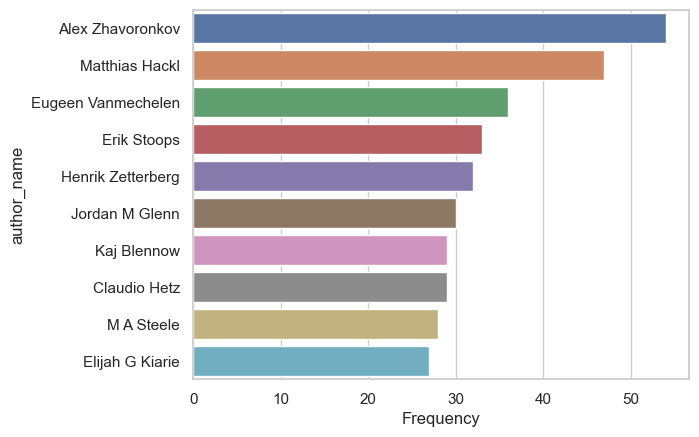

In [26]:
make_barplot(authors_dataframe_final,"author_name")

# sepearte the authors into affliated to the company and not affliated to the company